<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [80]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [81]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [82]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# **Data Visualization**

### Boxplot for "Median value of owner-occupied homes"

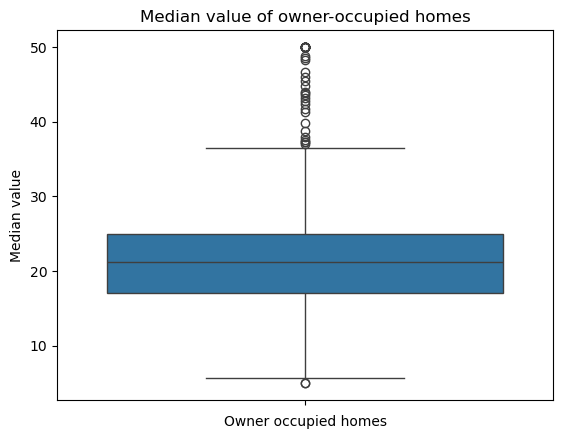

In [83]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Median value of owner-occupied homes")
pyplot.xlabel("Owner occupied homes")
pyplot.ylabel("Median value")
pyplot.show()

The boxplot presents the median value of owner occupied homes. We can see there are many outliers with higher values, the median value of medians is arounc 20.  

### Bar plot for the Charles river variable

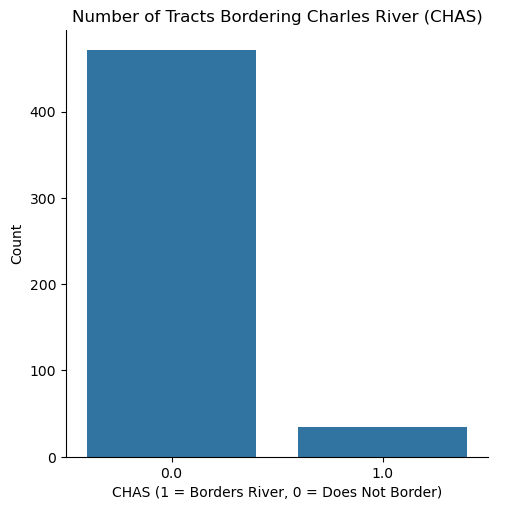

In [84]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title("Number of Tracts Bordering Charles River (CHAS)")
pyplot.xlabel("CHAS (1 = Borders River, 0 = Does Not Border)")
pyplot.ylabel("Count")
pyplot.show()

There are significantly more tracts that are not adjacent to the Charles river. 

### Boxplot for the MEDV variable vs the AGE variable. 
Discretized the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

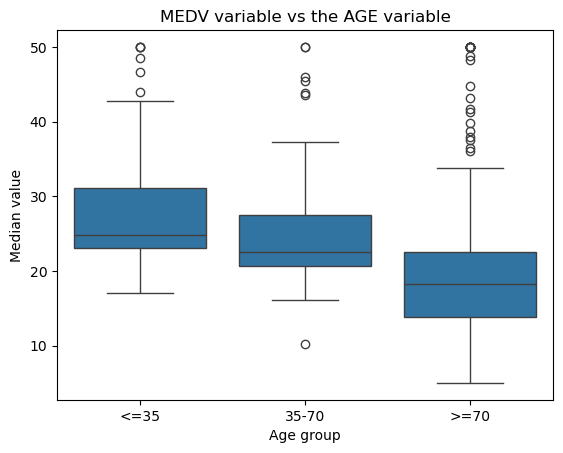

In [85]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGEGROUP'] = '<=35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGEGROUP'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGEGROUP'] = '>=70'

order = ["<=35", "35-70", ">=70"]
ax = sns.boxplot(x='AGEGROUP', y='MEDV', data=boston_df, order=order)
pyplot.title("MEDV variable vs the AGE variable")
pyplot.xlabel("Age group")
pyplot.ylabel("Median value")
pyplot.show()

There seems to be a trend where the median values of homes is higher with lower age.

### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
What can you say about the relationship?

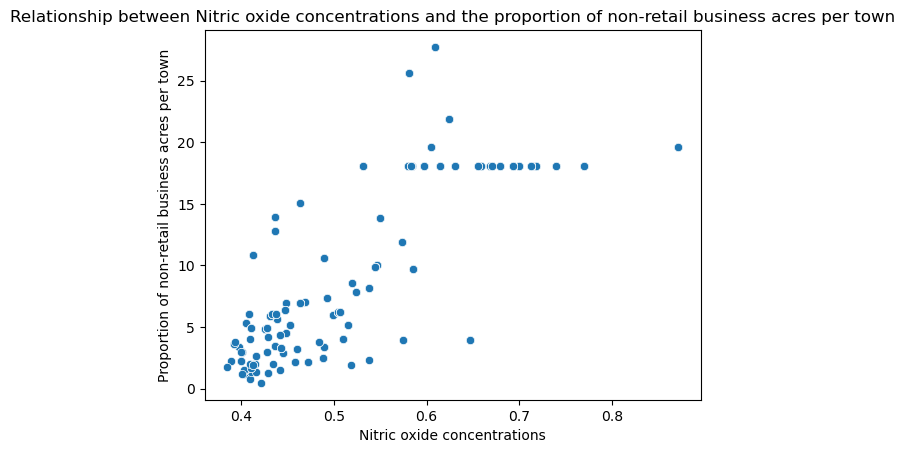

In [86]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
pyplot.xlabel("Nitric oxide concentrations")
pyplot.ylabel("Proportion of non-retail business acres per town")
pyplot.show()

There seems to be a positive correlation between the two variables. THe higher the proportion of non-retail business acres per twon, the higher the nitric oxide contentrations (and vice versa).

### Histogram for the pupil to teacher ratio variable

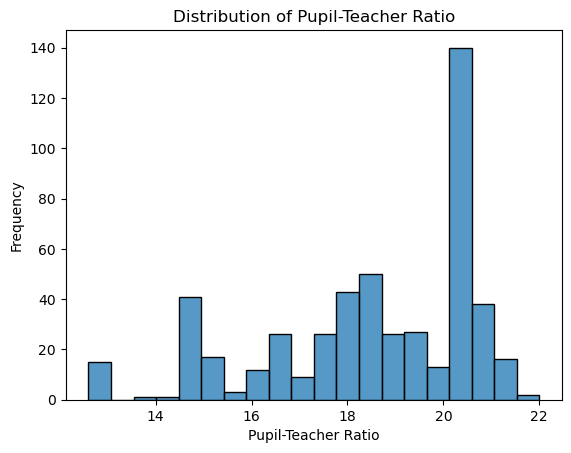

In [87]:
ax = sns.histplot(boston_df['PTRATIO'], kde=False, bins=20)
pyplot.title("Distribution of Pupil-Teacher Ratio")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

There seems to be rather equal frequency distribution with around 20-40 towns with similar pupil to teacher ratios. The most common ratio is for around 21 pupils per teacher with around 140 towns. 

# **Use the appropriate tests to answer the questions provided**

### Is there a significant difference in median value of houses bounded by the Charles river?

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in value of houses between houses bounded or not bounded by Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is no difference in value of houses between houses bounded or not bounded by Charles river")

We can plot the dependent variable with a historgram

C:\Users\cnole\AppData\Local\Temp\ipykernel_42572\2546675706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Median value of houses')]

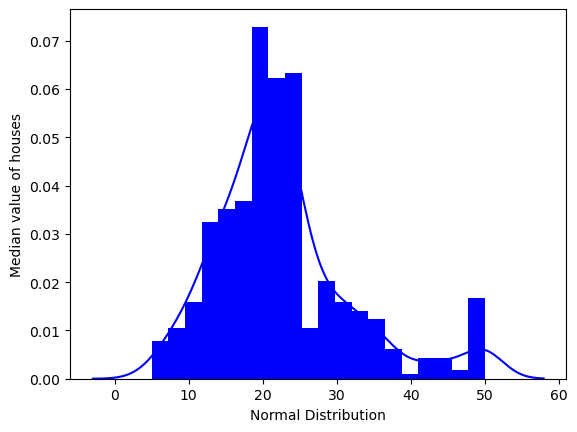

In [88]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Median value of houses')
## we can assume it is normal

We can use the Levene's Test in Python to check test significance

In [89]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume unequality of variance

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [90]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in house values bounded by the Charles river


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the same age groups as for visualisaiton, we will create a new column for this newly assigned group our categories will be rows with AGE that are 35 years and younger, between 35 and 70 years and 70 years and older.

In [91]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGEGROUP'] = '<=35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGEGROUP'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGEGROUP'] = '>=70'

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance

In [92]:
scipy.stats.levene(boston_df[boston_df['AGEGROUP'] == '<=35']['MEDV'],
                   boston_df[boston_df['AGEGROUP'] == '35-70']['MEDV'], 
                   boston_df[boston_df['AGEGROUP'] == '>=70']['MEDV'], 
                   center='mean')
# since the p-value is more than 0.05, the variance are equal

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

Run the ANOVA test

In [93]:
f_statistic, p_value = scipy.stats.f_oneway(
    boston_df[boston_df['AGEGROUP'] == '<=35']['MEDV'],
    boston_df[boston_df['AGEGROUP'] == '35-70']['MEDV'],
    boston_df[boston_df['AGEGROUP'] == '>=70']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


Since they are both continuous variables we can use a pearson correlation test. The scatter plot of the correlation is presented above in the visualisation part of the exercise.

In [94]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241167e-98))

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-tetail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

State the hypothesis:

*   $H\_0:$ The median value of owner occupied homes is not correlated with weighted distance to the five Boston employment centres
*   $H\_1:$ The median value of owner occupied homes is correlated with weighted distance to the five Boston employment centres


In [95]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        13:55:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between weighted distances to five Boston employment centres and mdedian value of owner occupied homes. The correlation coefficient is equal to 0.25 (with 2-digit precision). The coefficient is equal to +1.092, which means that an increase of 1 unit in DIS, will increase the MEDV by 1.092, i.e. price goes up by 1092 USD (as MEDV is expressed in $1000s). 

The plot below nicely illustrates the correlation. The higher the distance, the higher the median value of the properties. 

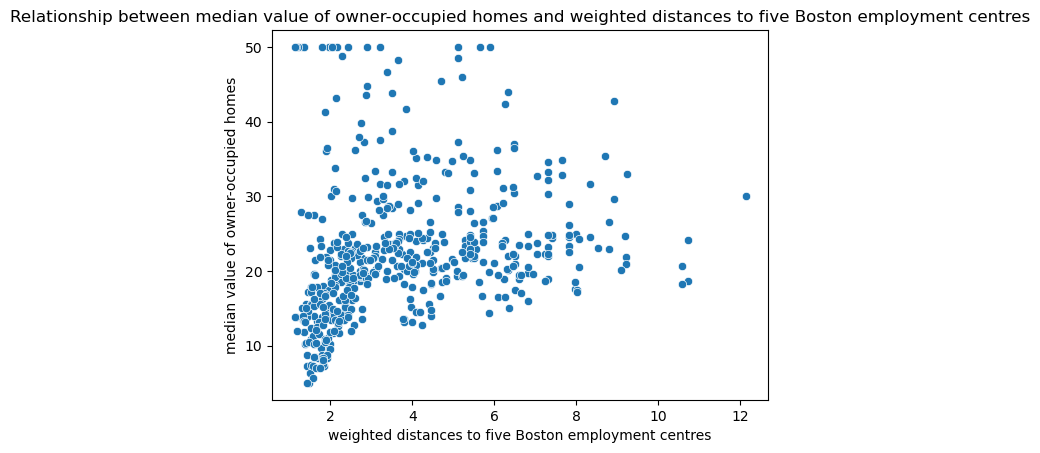

In [96]:
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
pyplot.title("Relationship between median value of owner-occupied homes and weighted distances to five Boston employment centres")
pyplot.xlabel("weighted distances to five Boston employment centres")
pyplot.ylabel("median value of owner-occupied homes")
pyplot.show()